In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from word2number import w2n

In [2]:
df = pd.read_csv('expected_salary.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.experience = df.experience.apply(w2n.word_to_num)

In [5]:
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
df.test_score = df.test_score.fillna(df.test_score.median())
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [7]:
df.test_score.median()

np.float64(8.0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      int64  
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes


In [9]:
df.experience = df.experience.astype(int)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [10]:
df.test_score = df.test_score.astype(int)
df

,experience,test_score,interview_score,salary
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,8,7,72000
7,11,7,8,80000


In [11]:
df.describe()

,experience,test_score,interview_score,salary
count,8.00000,8.000000,8.000000,8.00000
mean,4.75000,7.875000,7.875000,63000.00000
std,4.26782,1.246423,1.642081,11501.55269
min,0.00000,6.000000,6.000000,45000.00000
25%,1.50000,7.000000,6.750000,57500.00000
50%,4.00000,8.000000,7.500000,63500.00000
75%,7.75000,8.250000,9.250000,70500.00000
max,11.00000,10.000000,10.000000,80000.00000


<BarContainer object of 8 artists>

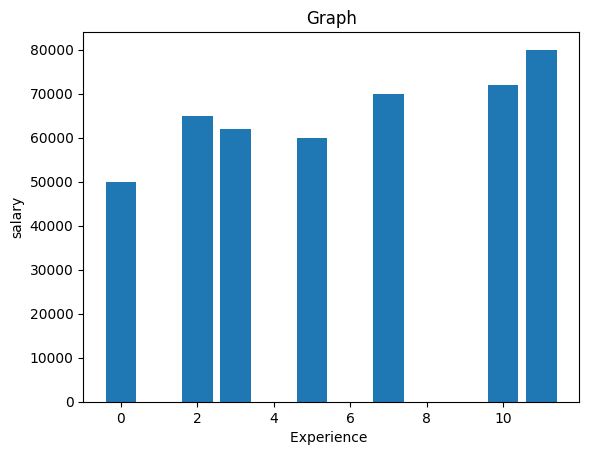

In [12]:
%matplotlib inline 
plt.title('Graph')
plt.xlabel('Experience ')
plt.ylabel('salary')
plt.bar(df.experience, df.salary)

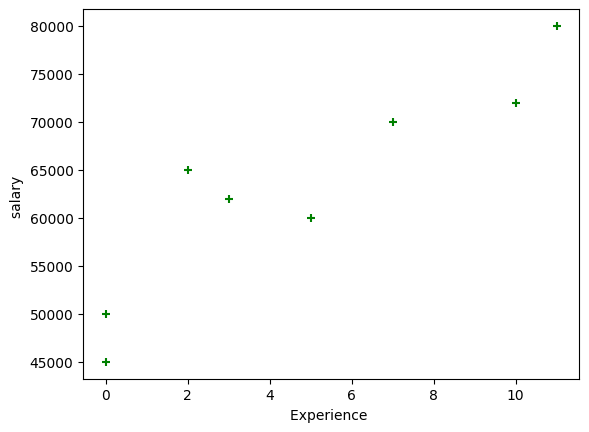

In [13]:
plt.xlabel('Experience ')
plt.ylabel('salary ')
plt.scatter(df.experience, df.salary, color = 'green', marker = '+')


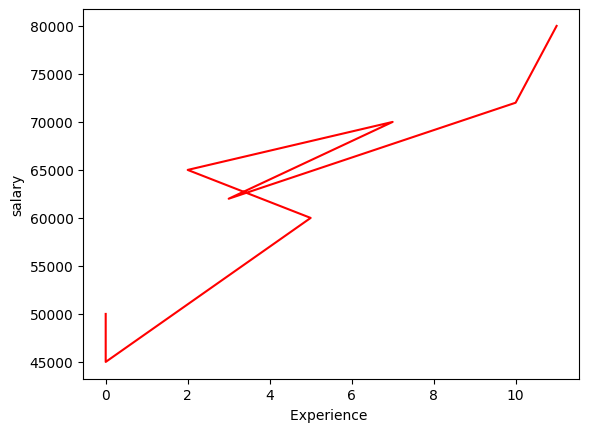

In [14]:
plt.xlabel('Experience ')
plt.ylabel('salary')
plt.plot(df.experience, df.salary , color = 'red')

In [15]:
from sklearn import linear_model

In [16]:
model = linear_model.LinearRegression()

In [17]:
input_data = df.drop(columns='salary')
output_data = df.salary

In [18]:
input_data

,experience,test_score,interview_score
0,0,8,9
1,0,8,6
2,5,6,7
3,2,10,10
4,7,9,6
5,3,7,10
6,10,8,7
7,11,7,8


In [19]:
output_data

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary, dtype: int64

In [22]:
model.fit(input_data,output_data)

LinearRegression()

In [23]:
model.predict([[2,8,6]])


C:\Users\prakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51360.26200873])

In [24]:
model.predict([[4,2,3]])

C:\Users\prakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39296.2154294])

In [25]:
model.coef_


array([2812.95487627, 1845.70596798, 2205.24017467])

In [26]:
model.intercept_

np.float64(17737.263464337688)

In [27]:
2812.95487627*4 + 17737.263464337688

28989.082969417686

this is the linear regression formula inplement y = m*x + c gives salary as an y
